In this assignment, we analyze the MNIST handwritten digits dataset using <br>
neural networks. The dataset consists of greyscale images of hand written digits <br>
0, 1, . . . , 9 that have been normalized to 28 × 28 bitmap images. Each image is <br>
accompanied by the correct label. We will construct a classifier that classifies <br>
the images to their correct labels.

## Problem 1
Set up PyTorch in your Anaconda environment. The following invocation should <br>
install the CPU only version: <br>
```bash
conda install -c pytorch pytorch torchvision cpuonly <br>
```
Load the dataset (both training and test set) using the torchvision.datasets <br>
module. Note that the you probably want to use the transform option to <br>
convert the images into Tensors. By default, the images come as PIL1 images. <br>
Use matplotlib to plot some images in greyscale, and include at least one <br>
from each set in your report. Verify that the images have the correct dimensions <br>
(28 × 28) and scale for values (values should be normalized to be in range [0, 1]).

torch.Size([10000, 28, 28])
torch.Size([60000, 28, 28])
Max element size in first train sample 1.0
Min element size in first train sample 0.0


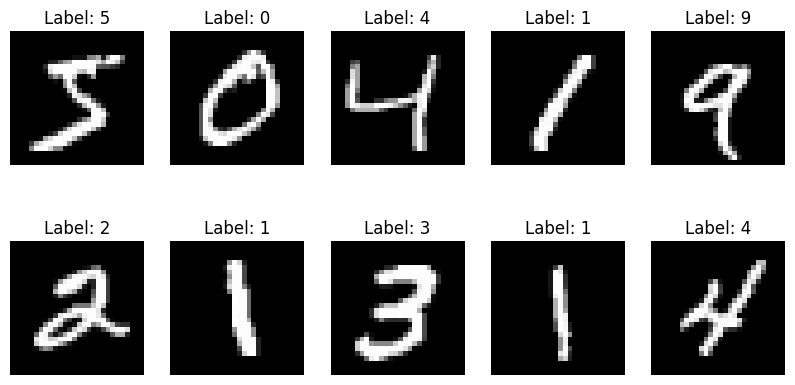

In [23]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torchvision import transforms
from torch import Tensor

transformer = transforms.Compose([
    transforms.ToTensor(),
])

train_set = MNIST(root='./data', download=True, transform=transformer, train=True)
test_set = MNIST(root='./data', download=True, transform=transformer, train=False)

print(test_set.data.shape) # Test data is 10000 examples of 28x28
print(train_set.data.shape) # Train data is 60000 examples of 28x28

image, label = train_set[0]
# Print the first image in the training and test sets to show the normalisation
print(f'Max element size in first train sample {torch.max(image)}')
print(f'Min element size in first train sample {torch.min(image)}')

# Show the first 10 training image as a nparray mapped to a grayscale image
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    image: Tensor = train_set[i][0]
    label = train_set[i][1]
    plt.imshow(image.squeeze().numpy(), cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
plt.show()

## Problem 2
Construct a fully-connected feedforward network with one hidden layer. Use <br>
the ReLU as the activation function. Train the network for at least 10 epochs <br>
using stochastic gradient descent (torch.optim.SGD) for optimization and cross <br>
entropy loss (torch.nn.CrossEntropyLoss) for loss function. Report the vali- <br>
dation accuracy of your network (with respect to the test set) after each epoch. <br>
Report all relevant parameters you chose.

In [24]:
import torch.nn as nn
from torch.nn import CrossEntropyLoss
from torch.optim import SGD
from torch.utils.data.dataloader import DataLoader

# Hyperparameters
N_EPOCHS = 10
BATCHSIZE = 10
LR = 0.1
INPUT_SIZE = 28*28
HIDDEN_SIZE = 128
OUTPUT_SIZE = 10

# For our model we went for a 10 element output tensor where each element correspond to a certain image being a number
# No acitvation function in ouput layer as this was not mentioned in the task, from what we read this is also not
# necessary as the CrossEntropyLoss function will apply the softmax function to the output of the model
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(INPUT_SIZE, HIDDEN_SIZE),
    nn.ReLU(),
    nn.Linear(HIDDEN_SIZE, OUTPUT_SIZE) 
)

# Loss function to calculate predictions vs label distance, 
# and optimizer (Stochastic Gradient Descent) to modify model weights.
loss_function = CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=LR)

# Divide data into batches, shuffe only the training data.
# There is no need to shuffle test data since its not for training
# and does not affect the weights of the model.
train_loader = DataLoader(train_set, batch_size=BATCHSIZE, shuffle=True)
test_loader = DataLoader(test_set, batch_size=BATCHSIZE, shuffle=False)

# Training the model using batches, we got faster results when training the 
# model on the whole data set at once. Albeit that is more memory intensive when using bigger datasets.
# We never apply softmax to the output of the model as the CrossEntropyLoss function will do this for us
# in training. In the evaluation phase this isnt necessary either since the argmax function will still return the
# correct class, or "highest probability" if you will.

accuracies = []

for i in range(N_EPOCHS):

    # Training loop

    model.train() # set model to training mode, im guessing this enables some things internally in PyTorch
    for batch in train_loader:
        Xs_train, ys_train = batch
        optimizer.zero_grad() # zero the gradients
        ys_pred = model(Xs_train)
        loss: Tensor = loss_function(ys_pred, ys_train)
        loss.backward() # backward pass
        optimizer.step() # update weights

    correct = 0
    total = 0

    # Evaluation loop

    model.eval() # set model to evaluation mode, im guessing this disables some things internally in PyTorch
    with torch.no_grad(): # no need to track gradients during evaluation
        for batch in test_loader:
            Xs_test: Tensor = batch[0]
            ys_test: Tensor = batch[1]
            output: Tensor = model(Xs_test)
            predicted = torch.argmax(output, 1)
            total += ys_test.size(0)
            # sum up all elements in the tensor that are equal
            # use .item() to get the value as a python number as 
            # result is a tensor with one element
            correct += (predicted == ys_test).sum().item() 
            accuracy = (correct / total) * 100
            
    accuracies.append(accuracy)

plt.plot(accuracies)
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.xticks(range(N_EPOCHS))
plt.ylabel(r'Accuracy (% of correct predictions)')
plt.show()


KeyboardInterrupt: 

## Problem 3
Construct a fully-connected feedforward network with two hidden layers that
have 500 and 300 units, respectively. As before, use ReLU, SGD, and cross
entropy loss. In addition, enable L2 regularization using a suitable (probably
rather small) value for the weight decay parameter of the optimizer. Train the
network for at least 40 epochs and report the validation accuracy after each
epoch. You should be able to achieve an accuracy of at least 98%

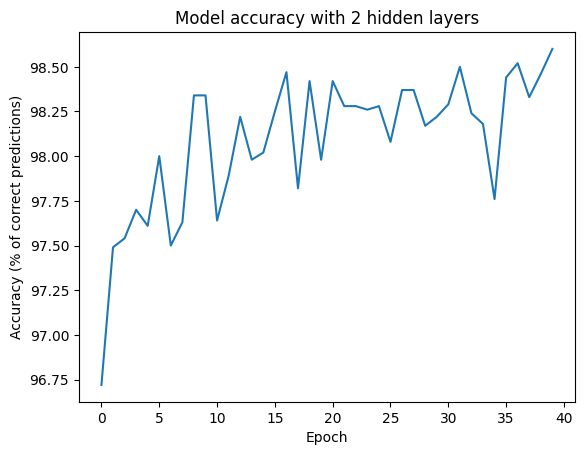

In [ ]:
# Hyperparameters
N_EPOCHS = 40
BATCHSIZE = 10
LR = 0.1
INPUT_SIZE = 28*28
HIDDEN_SIZE1 = 500
HIDDEN_SIZE2 = 300
OUTPUT_SIZE = 10
WEIGHT_DECAY = 0.0001

# Creating the model
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(INPUT_SIZE, HIDDEN_SIZE1),
    nn.ReLU(),
    nn.Linear(HIDDEN_SIZE1, HIDDEN_SIZE2),
    nn.ReLU(),
    nn.Linear(HIDDEN_SIZE2, OUTPUT_SIZE) 
)

# Loss function to calculate predictions vs label distance, 
# and optimizer (Stochastic Gradient Descent) to modify model 
# weights using a weight decay > 0.
loss_function = CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

train_loader = DataLoader(train_set, batch_size=BATCHSIZE, shuffle=True)
test_loader = DataLoader(test_set, batch_size=BATCHSIZE, shuffle=False)

accuracies = []

for i in range(N_EPOCHS):

    # Training loop

    model.train() # set model to training mode, im guessing this enables some things internally in PyTorch
    for batch in train_loader:
        Xs_train, ys_train = batch
        optimizer.zero_grad() # zero the gradients
        ys_pred = model(Xs_train)
        loss: Tensor = loss_function(ys_pred, ys_train)
        loss.backward() # backward pass
        optimizer.step() # update weights

    correct = 0
    total = 0

    # Evaluation loop

    model.eval() # set model to evaluation mode, im guessing this disables some things internally in PyTorch
    with torch.no_grad(): # no need to track gradients during evaluation
        for batch in test_loader:
            Xs_test: Tensor = batch[0]
            ys_test: Tensor = batch[1]
            output: Tensor = model(Xs_test)
            predicted = torch.argmax(output, 1)
            total += ys_test.size(0)
            # sum up all elements in the tensor that are equal
            # use .item() to get the value as a python number as 
            # result is a tensor with one element
            correct += (predicted == ys_test).sum().item() 
            accuracy = (correct / total) * 100
            
    accuracies.append(accuracy)

plt.plot(accuracies)
plt.title('Model accuracy with 2 hidden layers')
plt.xlabel('Epoch')
plt.xticks(range(0, N_EPOCHS + 1,5))
plt.ylabel(r'Accuracy (% of correct predictions)')
plt.show()

## Problem 4
Construct a feedforward network with at least two convolutional layers. As
before, use ReLU, SGD, and cross entropy loss, and choose a suitable value for
weight loss. Train the network for at least 40 epochs and report the validation
accuracy after each epoch. You should be able to reach an accuracy of at least
99%. If you cannot reach that value, then report the value you reached anyway.
Describe the structure of your network, and all relevant parameter choices you
made

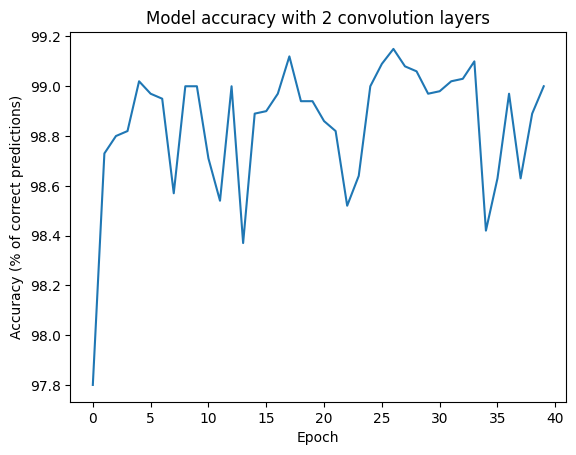

In [26]:
transformer = transforms.Compose([
    transforms.ToTensor(),
])

train_set = MNIST(root='./data', download=True, transform=transformer, train=True)
test_set = MNIST(root='./data', download=True, transform=transformer, train=False)

# Hyperparameters
N_EPOCHS = 40
BATCHSIZE = 10
LR = 0.1
INPUT_SIZE = 28*28
OUTPUT_SIZE = 10
NUM_CHANNELS_CONV1 = 6
NUM_CHANNELS_CONV2 = 16
FIRST_LINEAR = 256
SECOND_LINEAR = 120
THIRD_LINEAR = 84
WEIGHT_DECAY = 0.0001

# Creating the model, based of LeNet-5
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=NUM_CHANNELS_CONV1, kernel_size=5, padding=0, stride=1),
    nn.BatchNorm2d(6),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size = 2, stride = 2),
    nn.Conv2d(in_channels= NUM_CHANNELS_CONV1, out_channels=NUM_CHANNELS_CONV2, kernel_size=5, padding=0, stride=1),
    nn.BatchNorm2d(16),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size = 2,stride = 2),
    nn.Flatten(),
    nn.Linear(FIRST_LINEAR, SECOND_LINEAR), 
    nn.ReLU(),
    nn.Linear(SECOND_LINEAR, THIRD_LINEAR),
    nn.ReLU(),
    nn.Linear(THIRD_LINEAR, OUTPUT_SIZE)
)

# Loss function to calculate predictions vs label distance, 
# and optimizer (Stochastic Gradient Descent) to modify model 
# weights using a weight decay > 0.
loss_function = CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

train_loader = DataLoader(train_set, batch_size=BATCHSIZE, shuffle=True)
test_loader = DataLoader(test_set, batch_size=BATCHSIZE, shuffle=False)

accuracies = []

for i in range(N_EPOCHS):

    # Training loop

    model.train() # set model to training mode, im guessing this enables some things internally in PyTorch
    for batch in train_loader:
        Xs_train, ys_train = batch
        optimizer.zero_grad() # zero the gradients
        ys_pred = model(Xs_train)
        loss: Tensor = loss_function(ys_pred, ys_train)
        loss.backward() # backward pass
        optimizer.step() # update weights

    correct = 0
    total = 0

    # Evaluation loop

    model.eval() # set model to evaluation mode, im guessing this disables some things internally in PyTorch
    with torch.no_grad(): # no need to track gradients during evaluation
        for batch in test_loader:
            Xs_test: Tensor = batch[0]
            ys_test: Tensor = batch[1]
            output: Tensor = model(Xs_test)
            predicted = torch.argmax(output, 1)
            total += ys_test.size(0)
            # sum up all elements in the tensor that are equal
            # use .item() to get the value as a python number as 
            # result is a tensor with one element
            correct += (predicted == ys_test).sum().item() 
            accuracy = (correct / total) * 100
            
    accuracies.append(accuracy)

plt.plot(accuracies)
plt.title('Model accuracy with 2 convolution layers')
plt.xlabel('Epoch')
plt.xticks(range(0, N_EPOCHS + 1,5))
plt.ylabel(r'Accuracy (% of correct predictions)')
plt.show()